# Exploratory Data Analysis



#### Import Packages and Setting File Paths

In [1]:
import sys
import os

# Get the current working directory
current_dir = os.getcwd()

# Add the parent directory to sys.path
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.insert(0, parent_dir)

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from urllib.request import urlretrieve
from scipy.stats import pearsonr

from config.config import DATA_PATH


In [3]:
pd.set_option('display.max_columns', None)

# Flights Data Overview

In [7]:
flights = pd.read_csv(DATA_PATH + '/interim/2023-performance-data-clean.csv')

/var/folders/b2/nkpmrw0s42q_zm32rwshljyr0000gn/T/ipykernel_85312/1310068680.py:1: DtypeWarning: Columns (19,24,25,28) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv(DATA_PATH + '/interim/2023-performance-data-clean.csv')


In [8]:
flights.shape

(7260941, 53)

In [10]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7260941 entries, 0 to 7260940
Data columns (total 53 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Year                             int64  
 1   Quarter                          int64  
 2   Month                            int64  
 3   DayofMonth                       int64  
 4   DayOfWeek                        int64  
 5   FlightDate                       object 
 6   DOT_ID_Marketing_Airline         int64  
 7   Flight_Number_Marketing_Airline  int64  
 8   DOT_ID_Operating_Airline         int64  
 9   Tail_Number                      object 
 10  OriginAirportID                  int64  
 11  OriginCityMarketID               int64  
 12  Origin                           object 
 13  OriginState                      object 
 14  DestAirportID                    int64  
 15  DestCityMarketID                 int64  
 16  Dest                             object 
 17  DestStat

In [9]:
flights.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,DOT_ID_Marketing_Airline,Flight_Number_Marketing_Airline,DOT_ID_Operating_Airline,Tail_Number,OriginAirportID,OriginCityMarketID,Origin,OriginState,DestAirportID,DestCityMarketID,Dest,DestState,CRSDepTime,DepTime,DepDelay,DepDel15,DepartureDelayGroups,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DivAirportLandings,FlightDate_date_only,Code_Share_Flight,Origin_City,Destination_City,Overnight_Depature,Overnight_Arrival,Airline_Mkt,Airline_Ops
0,2023,3,8,7,1,2023-08-07,20416,2252,20416,974NK,12889,32211,LAS,NV,11057,31057,CLT,NC,23:59:00,01:15:00,76.0,1.0,5.0,19.0,01:34:00,08:22:00,9.0,07:22:00,08:31:00,69.0,1.0,4.0,0,0,263.0,256.0,228.0,1916.0,8,3.0,0.0,1.0,0.0,65.0,0.0,2023-08-07,0,Las Vegas,Charlotte,0,0,Spirit Air Lines,Spirit Air Lines
1,2023,3,8,9,3,2023-08-09,20416,2252,20416,519NK,12889,32211,LAS,NV,11057,31057,CLT,NC,23:10:00,22:59:00,-11.0,0.0,-1.0,14.0,23:13:00,06:05:00,10.0,06:28:00,06:15:00,-13.0,0.0,-1.0,0,0,258.0,256.0,232.0,1916.0,8,NaN,NaN,NaN,NaN,NaN,0.0,2023-08-09,0,Las Vegas,Charlotte,0,0,Spirit Air Lines,Spirit Air Lines
2,2023,3,8,10,4,2023-08-10,20416,2252,20416,532NK,12889,32211,LAS,NV,11057,31057,CLT,NC,23:10:00,23:02:00,-8.0,0.0,-1.0,12.0,23:14:00,05:51:00,7.0,06:28:00,05:58:00,-30.0,0.0,-2.0,0,0,258.0,236.0,217.0,1916.0,8,NaN,NaN,NaN,NaN,NaN,0.0,2023-08-10,0,Las Vegas,Charlotte,0,0,Spirit Air Lines,Spirit Air Lines
3,2023,3,8,12,6,2023-08-12,20416,2252,20416,529NK,12889,32211,LAS,NV,11057,31057,CLT,NC,23:10:00,23:14:00,4.0,0.0,0.0,18.0,23:32:00,06:18:00,6.0,06:28:00,06:24:00,-4.0,0.0,-1.0,0,0,258.0,250.0,226.0,1916.0,8,NaN,NaN,NaN,NaN,NaN,0.0,2023-08-12,0,Las Vegas,Charlotte,0,0,Spirit Air Lines,Spirit Air Lines
4,2023,3,8,13,7,2023-08-13,20416,2252,20416,524NK,12889,32211,LAS,NV,11057,31057,CLT,NC,23:10:00,00:03:00,53.0,1.0,3.0,24.0,00:27:00,07:31:00,9.0,06:28:00,07:40:00,72.0,1.0,4.0,0,0,258.0,277.0,244.0,1916.0,8,5.0,0.0,67.0,0.0,0.0,0.0,2023-08-13,0,Las Vegas,Charlotte,0,0,Spirit Air Lines,Spirit Air Lines


In [11]:
flights.isna().sum()

Year                                     0
Quarter                                  0
Month                                    0
DayofMonth                               0
DayOfWeek                                0
FlightDate                               0
DOT_ID_Marketing_Airline                 0
Flight_Number_Marketing_Airline          0
DOT_ID_Operating_Airline                 0
Tail_Number                          19648
OriginAirportID                          0
OriginCityMarketID                       0
Origin                                   0
OriginState                              0
DestAirportID                            0
DestCityMarketID                         0
Dest                                     0
DestState                                0
CRSDepTime                               0
DepTime                              90100
DepDelay                             90160
DepDel15                             90160
DepartureDelayGroups                 90160
TaxiOut    

In [78]:
arr_dep_diff = flights['ArrTime'].isna().sum() - flights['DepTime'].isna().sum()
arr_dep_diff

3797

In [73]:
missing_critical_data = ((flights['ArrTime'].isna()) & (flights['DepTime'].notna()))

flights[missing_critical_data]['Cancelled'].value_counts()


Cancelled
1    3797
Name: count, dtype: int64

## **Overall Data Attributes**

**Shape:** The dataset contains information for 7,260,941 completed and cancelled flights in 2023.

**Number of Features:** There are 53 columns currently. 

**dtypes:** Columns have the expected dtypes as some initial cleaning was completed during the data import phase. 

**Missing Values:** 
* Several columns are missing values because these represent the instances of cancelled flights. These columns include information about actual departure times, arrival times, and delay types. 
* Additionally, flights that did not encounter any delays are missing values for the various delay types (Carrier, Weather, NAS (severe weather), Security, Late Aircrafts), as would be expected. 
* There were 3,797 flights that departed and were then cancelled. These likely didn't even get wheels off the ground. 
* Just over 19,000 flights are missing tail number data. These rows would not be able to be joined with the aircraft registration dataframe later on. After gathering usefull information from these flights, I will consider dropping these rows. 

## Flights Status Overview

I want to look at the number and percentage of flights that were:
1. Completed
2. Cancelled
3. Arrival delays over 15 minutes
4. Departure delays over 15 minutes
5. On Time arrival
6. On Time departure
7. Early arrival
8. Early departure


In [13]:
# calculate number of completed and cancelled flights
cancelled_flights = flights['Cancelled'] == 1
completed_flights = flights['Cancelled'] == 0

total_cancellations = len(flights.loc[cancelled_flights])
total_completed_flights = len(flights.loc[~cancelled_flights])

print('The total number of completed flights in 2023: ', total_completed_flights)
print('The total number of cancelled flights in 2023: ', total_cancellations)

The total number of completed flights in 2023:  7167044
The total number of cancelled flights in 2023:  93897


In [14]:
# subset flights df into completed and cancelled flights
df_completed = flights.loc[completed_flights]
df_cancelled = flights.loc[cancelled_flights]

To calculate the percentage of canceled flights, use the following formula:

$$
\text{Percentage of Canceled Flights} = \left( \frac{\text{Number of Canceled Flights}}{\text{Total Number of Scheduled Flights}} \right) \times 100
$$

To calculate the percentage of completed flights, use the following formula:

$$
\text{Percentage of Completed Flights} = \left( \frac{\text{Number of Completed Flights}}{\text{Total Number of Scheduled Flights}} \right) \times 100
$$


In [15]:
flight_cancellation_perc = round(len(df_cancelled) / len(flights) * 100, 2)
flight_completion_perc = round(len(df_completed) / len(flights) * 100, 2)

print(f'The percent of cancelled flights is {flight_cancellation_perc}% and the percent of completed flights is {flight_completion_perc}%')

The percent of cancelled flights is 1.29% and the percent of completed flights is 98.71%


It is great to know that nearly all flights are completed. Although cancelled flights are somewhat of an anomaly, they usually result in high costs for the airline and dissatisfied customers. 

In [16]:
def categorize_flight_status(status):
    """
    Categorize the status of a flight based on its delay time.

    This function classifies the flight status into one of four categories:
    'early', 'on time', 'delayed', or 'unknown'. The classification is based on
    the numerical value provided to the function, which represents the flight's
    delay in minutes.

    Parameters:
    status (float or int): The delay time of the flight. This can be:
        - A negative number indicating the flight arrived or departed early.
        - Zero to <15, indicating the flight was on time.
        - A positive number over 15 indicating the flight was delayed.
        - NaN or any non-numeric value, which will be categorized as 'unknown'.

    Returns:
    str: A string representing the category of the flight's timeliness:
        - 'early' if the status is less than 0.
        - 'on time' if the status is greater than or equal to 0 and less than 15.
        - 'delayed' if the status is greater than 15.
        - 'unknown' if the status is NaN or an unexpected non-numeric value.
    """

    if status < 0:
        return 'early'
    elif 0 <= status < 15 :
        return 'on time'
    elif status > 15:
        return 'delayed'
    else:
        return 'unknown'


In [17]:
# categorize flights by status
flights['Departure_Status'] = flights['DepDelay'].apply(categorize_flight_status)
flights['Arrival_Status'] = flights['ArrDelay'].apply(categorize_flight_status)

In [35]:
arrival_status_counts = round(flights[['Arrival_Status']].value_counts(normalize=True) * 100, 1).sort_index()
arrival_status_counts

Arrival_Status
delayed           19.5
early             60.9
on time           17.6
unknown            2.0
Name: proportion, dtype: float64

In [30]:
departure_status_counts = round(flights['Departure_Status'].value_counts(normalize=True) * 100, 1).sort_index()
departure_status_counts

Departure_Status
delayed    19.3
early      57.3
on time    21.4
unknown     1.9
Name: proportion, dtype: float64

Approximately 19.5% of flights experienced arrival delays and 19.3% experienced depature delays.

Slightly more flights arrive early (60.9%) compared to depart early (57.3%).

Slightly less flights arrive on time (17.6%) compared to depart on time (21.4%).

In [47]:
arrivals = flights[['Arrival_Status']].rename(columns={'Arrival_Status':'Status'})
arrivals['Type'] = 'arrival'

departures = flights[['Departure_Status']].rename(columns={'Departure_Status':'Status'})
departures['Type'] = 'departure'

status_df = pd.concat([arrivals, departures])

status_counts = status_df.groupby(['Status', 'Type']).size().reset_index(name='Count')
status_counts

,Status,Type,Count
0,delayed,arrival,1415062
1,delayed,departure,1404198
2,early,arrival,4423925
3,early,departure,4164117
4,on time,arrival,1278580
5,on time,departure,1553784
6,unknown,arrival,143374
7,unknown,departure,138842


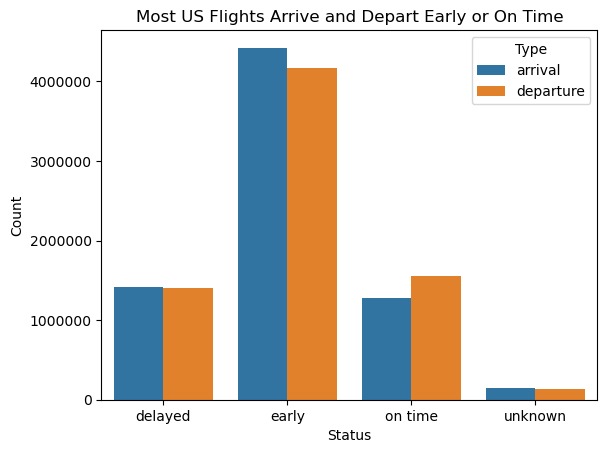

In [55]:
# create a bar plot to compare arrival and departure status counts
fig, ax = plt.subplots()
sns.barplot(data=status_counts, x='Status', y='Count', hue='Type')
plt.title('Most US Flights Arrive and Depart Early or On Time')
plt.ylabel('Count')
plt.xlabel('Status')

plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.gca().ticklabel_format(useOffset=False, style='plain', axis='y')

plt.show()

In [56]:
flights[['DepDelay', 'ArrDelay']].describe().apply(lambda x: x.apply('{0:.2f}'.format))

,DepDelay,ArrDelay
count,7170781.00,7167044.00
mean,12.16,6.63
std,55.71,57.57
min,-99.00,-119.00
25%,-6.00,-15.00
50%,-2.00,-6.00
75%,9.00,9.00
max,5764.00,5780.00


**Distribution of Departure and Arrival Delays**

Over 75% of flights arrive and depart early and/or on time. 

The range for departures is between 99 minutes early to 5,764 minutes late. The range for arrivals is between 119 minutes early and 5,780 minutes late.

Departure and arrival delays for the top 25th percentile of flights, excluding the maximum, ranges between 9 minutes to 96 hours.

There is at least one huge outlier for departure delay and arrival delay with a delay over 5,700 minutes! Next I will take a closer look at arrival and departure outliers. 

1,415,062 flights experienced an arrival delay of at least 15 minutes and 1,404,198 flights experienced a departure delay of 15 minutes.


In [75]:
flights_corr_df = flights.dropna(subset='ArrDelay')

In [76]:
pearsonr(flights_corr_df['DepDelay'], flights_corr_df['ArrDelay'])

PearsonRResult(statistic=0.9712458490566458, pvalue=0.0)

<Axes: xlabel='DepDelay', ylabel='ArrDelay'>

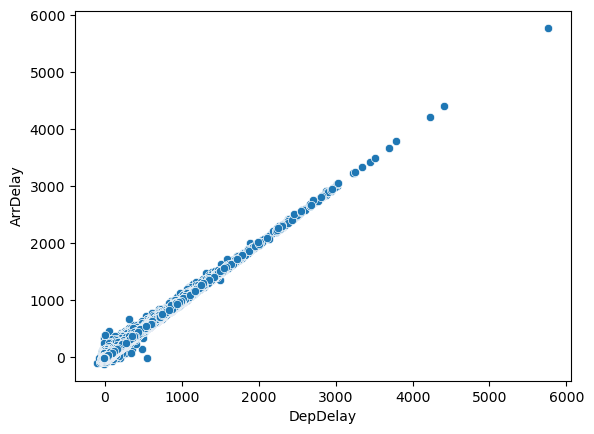

In [62]:
sns.scatterplot(data=flights, x='DepDelay', y='ArrDelay')

## Arrival and Departure Delay Outliers

In [30]:
def identify_outliers(df, col):
    """
    Calculate the upper and lower bounds to identify outliers in a dataset.

    This function uses the Interquartile Range (IQR) to determine outliers. It computes the IQR for a specified column
    of a pandas DataFrame, and uses this to calculate boundaries that define outliers. Values falling outside of these
    boundaries are considered outliers.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data to analyze.
    col (str): The name of the column in the DataFrame for which to calculate the outlier bounds.

    Returns:
    tuple: A tuple containing three elements:
        - upper_bound (float): The upper bound value beyond which data points are considered outliers.
        - lower_bound (float): The lower bound value below which data points are considered outliers.
        - iqr (float): The Interquartile Range (IQR) of the column.
        """
    
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr

    return upper_bound, lower_bound, iqr

In [31]:
arr_outlier_upper, arr_outlier_lower, arr_iqr = identify_outliers(df, 'ArrDelay')
print(f'Arrival delay upper outlier bound {arr_outlier_upper}, lower bound {arr_outlier_lower}, and IQR {arr_iqr}.')

dep_outlier_upper, dep_outlier_lower, del_iqr = identify_outliers(df, 'DepDelay')
print(f'Departure delay upper outlier bound {dep_outlier_upper}, lower bound {dep_outlier_lower}, and IQR {del_iqr}.')

Arrival delay upper outlier bound 45.0, lower bound -51.0, and IQR 24.0.
Departure delay upper outlier bound 31.5, lower bound -28.5, and IQR 15.0.


Although earlier we saw flight departures and arrivals can have some long delays, arrival delays longer than 45 minutes and departure delays more than 31.5 minutes are considered outliers. 

## Delays Grouped by Month

### Arrival Delays

[Text(0.5, 1.0, 'All Delayed Arrivals Grouped by Month'),
 Text(0, 0.5, 'Count of arrival delays')]

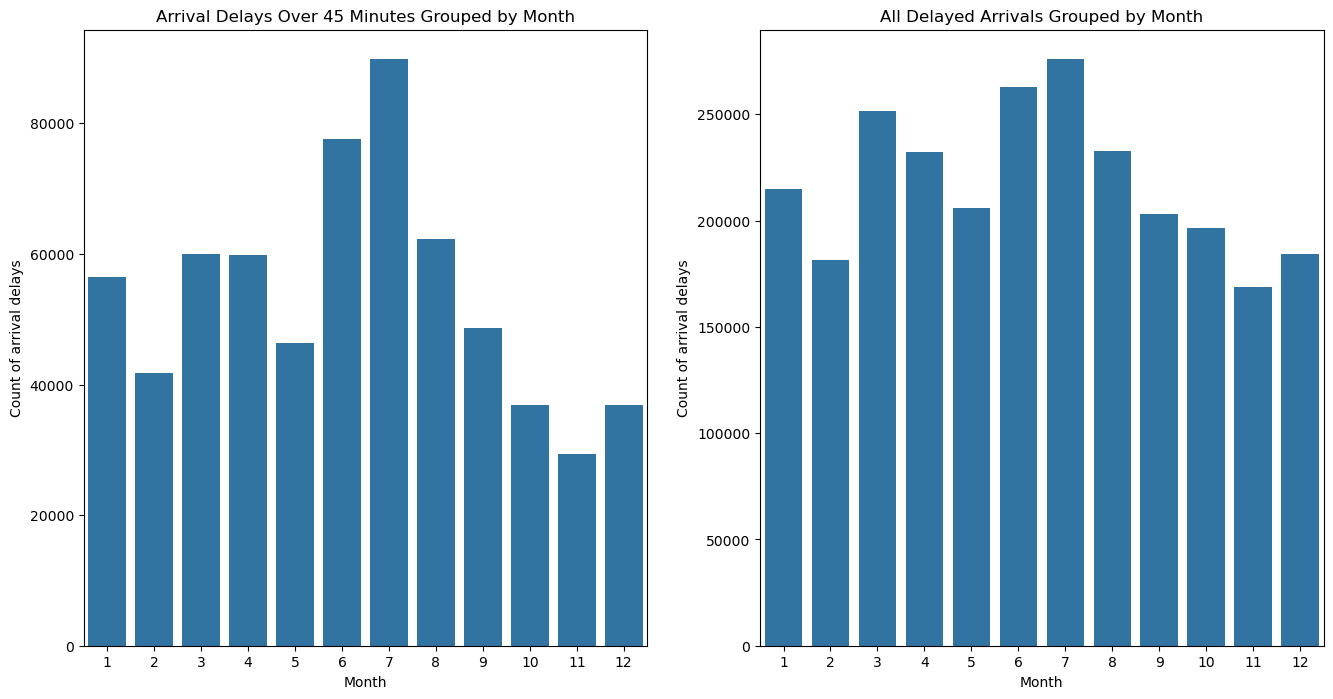

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

sns.barplot(df[df['ArrDelay'] > arr_outlier_upper].groupby('Month')['ArrDelay'].count(), ax=ax[0])
ax[0].set(title=f'Arrival Delays Over {round(arr_outlier_upper)} Minutes Grouped by Month', ylabel='Count of arrival delays')

sns.barplot(df[df['ArrDelay'] > 0].groupby('Month')['ArrDelay'].count(), ax=ax[1])
ax[1].set(title='All Delayed Arrivals Grouped by Month', ylabel='Count of arrival delays')

In [33]:
flights_per_month = df_completed.groupby('Month')['Tail_Number'].count().reset_index()
flights_per_month.columns = ['Month', 'Total_Flights']

arr_delay_outliers = df[df['ArrDelay'] > arr_outlier_upper].groupby('Month')['ArrDelay'].count().reset_index()
arr_delay_outliers.columns = ['Month', 'Arr_Delay_Count']

arr_merged = pd.merge(arr_delay_outliers, flights_per_month, on='Month')
arr_merged['perc_del_per_month'] = round(arr_merged['Arr_Delay_Count'] / arr_merged['Total_Flights'] * 100, 2)
arr_merged.sort_values('perc_del_per_month', ascending=False)

,Month,Arr_Delay_Count,Total_Flights,perc_del_per_month
6,7,89844,620780,14.47
5,6,77669,598357,12.98
3,4,59783,584624,10.23
0,1,56513,561365,10.07
2,3,60012,606915,9.89
7,8,62233,628954,9.89
8,9,48675,595744,8.17
1,2,41717,525485,7.94
4,5,46433,611464,7.59
11,12,36878,602501,6.12


After comparing the arrival delay outliers to all arrival delays, there are some simiarities across months. July and June have the highest number of arrival delays when looking at all arrival delays and arrival delays over 45 minutes. Additionally, these months have the highest proportion of flights delayed over 45 minutes. 

Interestingly, October is the most popular month for flights, with over 632,400 flights completed that month, and it has the second lowest proportion of delays over 45 minutes. Approximately, 6% of flights in October were outlier delays compared to just over 14% of flights in July. This would suggest that the total number of flights does not result in a higher number of arrival delays. 

November had fewest number of flights delayed over 45 minutes and fewest number of all arrival delays. I find this particularly interesting because November is Thanksgiving and that holiday weekend has a reputation for flight delays. 

### Departure Delays

[Text(0.5, 1.0, 'All Delayed Departures Grouped by Month'),
 Text(0, 0.5, 'Count of departure delays')]

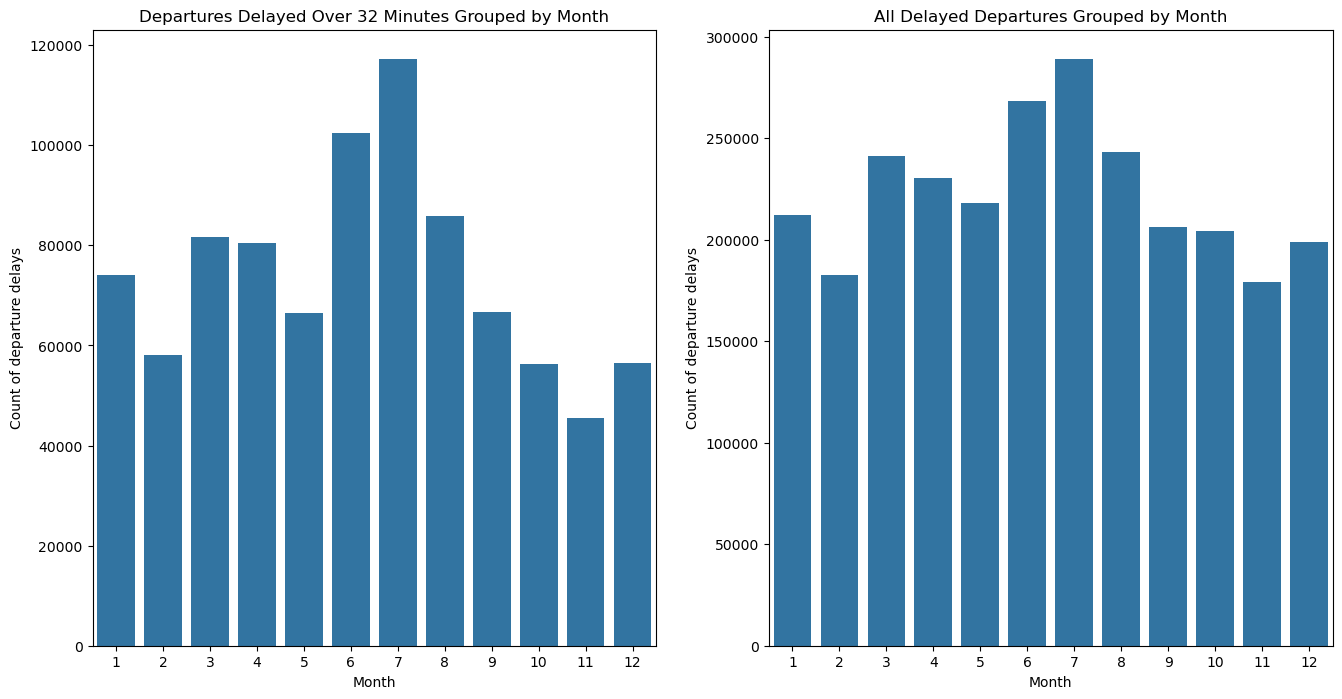

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

sns.barplot(df[df['DepDelay'] > dep_outlier_upper].groupby('Month')['DepDelay'].count(), ax=ax[0])
ax[0].set(title=f'Departures Delayed Over {round(dep_outlier_upper)} Minutes Grouped by Month', ylabel='Count of departure delays')

sns.barplot(df_completed[df_completed['DepDelay'] > 0].groupby('Month')['DepDelay'].count(), ax=ax[1])
ax[1].set(title='All Delayed Departures Grouped by Month', ylabel='Count of departure delays')

In [35]:
dep_delay_outliers = df[df['DepDelay'] > dep_outlier_upper].groupby('Month')['DepDelay'].count().reset_index()
dep_delay_outliers.columns = ['Month', 'Dep_Delay_Count']

dep_merged = pd.merge(dep_delay_outliers, flights_per_month, on='Month')
dep_merged['perc_del_per_month'] = round(dep_merged['Dep_Delay_Count'] / dep_merged['Total_Flights'] * 100, 2)
dep_merged.sort_values('Total_Flights', ascending=False)

,Month,Dep_Delay_Count,Total_Flights,perc_del_per_month
9,10,56307,632474,8.90
7,8,85929,628954,13.66
6,7,117219,620780,18.88
4,5,66456,611464,10.87
2,3,81588,606915,13.44
11,12,56492,602501,9.38
10,11,45556,598381,7.61
5,6,102354,598357,17.11
8,9,66771,595744,11.21
3,4,80381,584624,13.75


After comparing the departure delay outliers to all departure delays, there are some simiarities across months. Similar to arrivals, July and June have the highest number of departure delays when looking at all departure delays and arrival delays over 32 minutes. Additionally, these months have the highest proportion of flights with departures delayed over 32 minutes. 

Approximately, 9% of flights in October were outlier departure delays compared to nearly 19% of flights in July. This again would suggest that the total number of flights does not result in a higher number of departure delays. 

Again we see November had fewest number of flights with departure delays over 32 minutes and fewest number of all departure delays.

## Delays Grouped by State

In [36]:
# calculate total completed flights originating and destined for each state
total_flights_state_dest = df_completed.groupby('DestState')['Tail_Number'].count().reset_index()
total_flights_state_dest.columns = ['State', 'Total_Flights_Destination']
total_flights_state_origin = df_completed.groupby('OriginState')['Tail_Number'].count().reset_index()
total_flights_state_origin.columns = ['State', 'Total_Flights_Origin']

total_flights_state = total_flights_state_origin.merge(total_flights_state_dest, on='State')
total_flights_state.head()

,State,Total_Flights_Origin,Total_Flights_Destination
0,AK,41995,42008
1,AL,36054,36075
2,AR,28429,28460
3,AZ,204417,204528
4,CA,739878,740497


Text(0, 0.5, 'Count of delays')

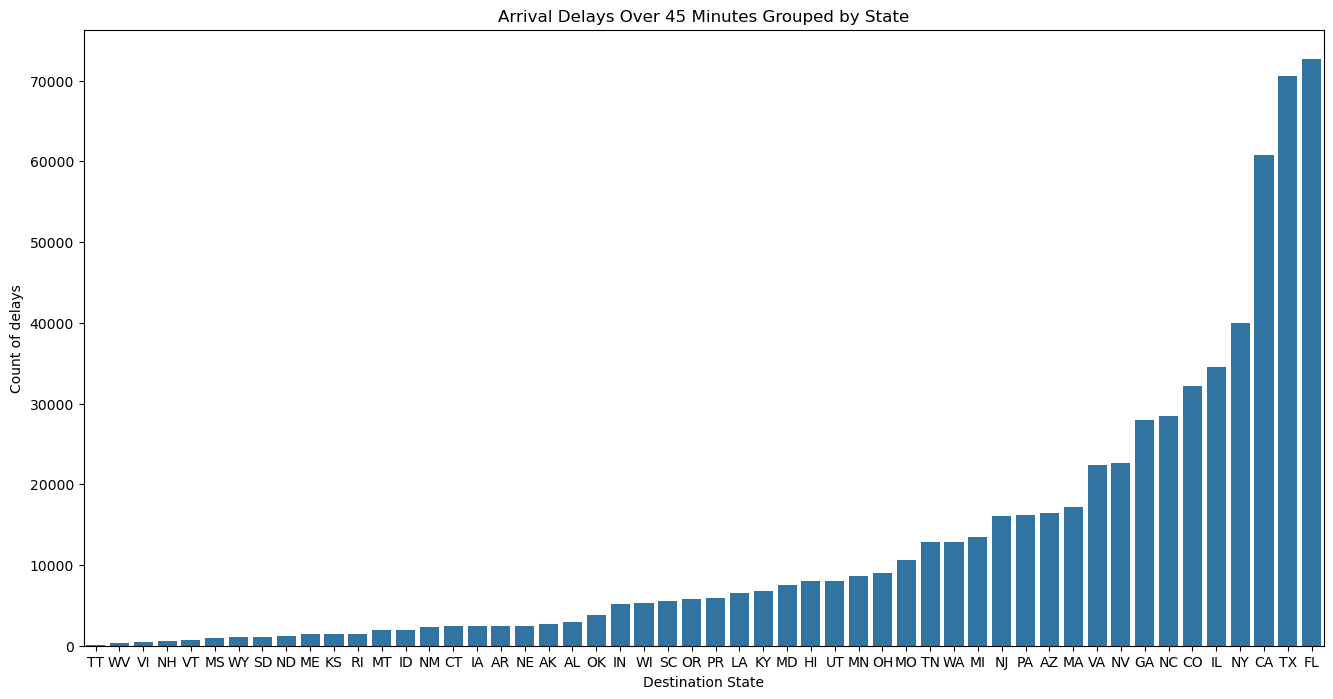

In [37]:
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(df[df['ArrDelay'] > arr_outlier_upper].groupby('DestState')['ArrDelay'].count().sort_values())
ax.set_title(f'Arrival Delays Over {round(arr_outlier_upper)} Minutes Grouped by State')
ax.set_xlabel('Destination State')
ax.set_ylabel('Count of delays')

Florida, Texas and California have the highest volume of arrival flight delays over 45 minutes. 

In [38]:
arrival_delay_state = df[df['ArrDelay'] > arr_outlier_upper].groupby('DestState')['ArrDelay'].count().reset_index()
arrival_delay_state.columns = ['State', 'Arrival_Delay_Count']
arrival_delay_state = pd.merge(arrival_delay_state, total_flights_state, on='State')
arrival_delay_state['perc_of_state_flights'] = round(arrival_delay_state['Arrival_Delay_Count'] / arrival_delay_state['Total_Flights_Destination'] * 100, 2)
arrival_delay_state.sort_values('perc_of_state_flights', ascending=False).head()

,State,Arrival_Delay_Count,Total_Flights_Origin,Total_Flights_Destination,perc_of_state_flights
37,PR,5863,35966,36117,16.23
7,FL,72666,604887,604342,12.02
17,MA,17235,143428,143499,12.01
31,NV,22660,209619,209667,10.81
6,CT,2440,22578,22609,10.79


In [39]:
arrival_delay_state['perc_of_state_flights'].mean()

8.596346153846154

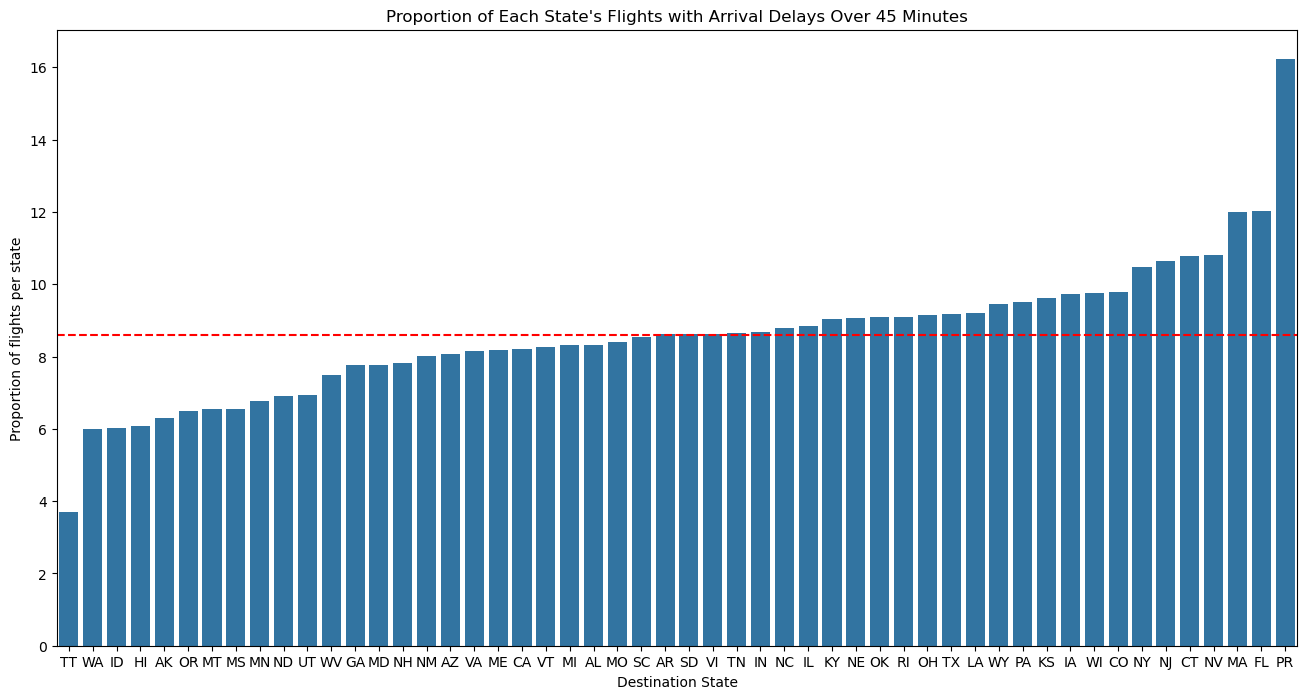

In [40]:
fig, ax = plt.subplots(figsize=(16,8))

sns.barplot(data=arrival_delay_state.sort_values('perc_of_state_flights', ascending=True), x='State', y='perc_of_state_flights')
ax.set_title(f"Proportion of Each State's Flights with Arrival Delays Over {round(arr_outlier_upper)} Minutes")
ax.set_xlabel('Destination State')
ax.set_ylabel('Proportion of flights per state')
ax.axhline(arrival_delay_state['perc_of_state_flights'].mean(), color='r', linestyle='--')

In [41]:
df_completed[(df_completed['DestState'] == "PR") & (df_completed['ArrDelay'] > 0)][delay_types].sum()

CarrierDelay         357608.0
WeatherDelay          32407.0
NASDelay             143637.0
SecurityDelay          3231.0
LateAircraftDelay    306419.0
dtype: float64

In 2023, Puerto Rico had the highest proportion of flights (16%) that were destined for its location encountering arrival delays over 45 minutes. In 2023, most of the arrival delays in Puerto Rico were due to Carrier Delays, Late Aircraft Delays, and NAS Delays. NAS Delays include non-extreme wether conditions. The region is prone to volatile weather such as hurricanes and tropical storms. 

In [42]:
df_completed.groupby('DestState')[delay_types].sum()

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
DestState,,,,,
AK,126141.0,27893.0,65081.0,6297.0,169666.0
AL,176126.0,42361.0,60625.0,412.0,167426.0
AR,124572.0,30815.0,51881.0,472.0,149472.0
AZ,1110739.0,115907.0,356255.0,6979.0,1229746.0
CA,3471928.0,356556.0,1537931.0,18924.0,3908727.0
CO,1657256.0,322076.0,1106069.0,5337.0,1894469.0
CT,151837.0,14740.0,49403.0,764.0,147859.0
FL,3554620.0,396062.0,2616952.0,26306.0,4342403.0
GA,1908799.0,270803.0,741265.0,8026.0,1651787.0


### Extreme Outliers (99.9th Percentile of Delays)

In [43]:
quantiles = [0.75, 0.8, 0.85, 0.9, 0.95, 0.99, 0.999, 1]

extreme_delays = pd.DataFrame(columns=['Delay Type', 'Quantile', 'Delays (min)'])

for quant in quantiles:
    extreme_delays.loc[len(extreme_delays)] = ['Departure', quant, df['DepDelay'].quantile(quant)]
    extreme_delays.loc[len(extreme_delays)] = ['Arrival', quant, df['ArrDelay'].quantile(quant)]

extreme_delays.sort_values(['Delay Type', 'Quantile'])

,Delay Type,Quantile,Delays (min)
1,Arrival,0.750,9.0
3,Arrival,0.800,15.0
5,Arrival,0.850,24.0
7,Arrival,0.900,41.0
9,Arrival,0.950,78.0
11,Arrival,0.990,207.0
13,Arrival,0.999,789.0
15,Arrival,1.000,5780.0
0,Departure,0.750,9.0
2,Departure,0.800,15.0


In [44]:
delay_extreme_outliers = (df['DepDelay'] > df['DepDelay'].quantile(0.999)) | (df['ArrDelay'] > df['ArrDelay'].quantile(0.999))

delay__extreme_outliers_df = df[delay_extreme_outliers]

delay__extreme_outliers_df[['DepDelay', 'ArrDelay']].describe()

,DepDelay,ArrDelay
count,7307.000000,7273.000000
mean,1062.155467,1059.136395
std,296.636244,296.985800
min,683.000000,757.000000
25%,878.000000,875.000000
50%,985.000000,981.000000
75%,1142.000000,1141.000000
max,5764.000000,5780.000000


Just over 7,000 flights are in the top 99.9th percentile of departure delays and similar for arrival delays. Even looking at these extreme outliers, there is still a huge range between delays. Extreme departure delays range from 11 hours to 96 hours. Extreme arrival delays  range from 12 hours to 96 hours. 

In [45]:
worst_arr_delay = delay__extreme_outliers_df[delay__extreme_outliers_df['ArrDelay'] == delay__extreme_outliers_df['ArrDelay'].max()]
worst_arr_delay

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,DOT_ID_Marketing_Airline,Flight_Number_Marketing_Airline,DOT_ID_Operating_Airline,Tail_Number,OriginAirportID,OriginCityMarketID,Origin,OriginState,DestAirportID,DestCityMarketID,Dest,DestState,CRSDepTime,DepTime,DepDelay,DepDel15,DepartureDelayGroups,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DivAirportLandings,FlightDate_date_only,Code_Share_Flight,Origin_City,Destination_City,Overnight_Depature,Overnight_Arrival,Airline_Mkt,Airline_Ops
2556856,2023,2,6,5,1,2023-06-05,19805,9680,20452,N118HQ,11278,30852,DCA,VA,12451,31136,JAX,FL,11:53:00,11:57:00,5764.0,1.0,12.0,22.0,12:19:00,14:11:00,6.0,13:57:00,14:17:00,5780.0,1.0,12.0,0,0,124.0,140.0,112.0,634.0,3,5764.0,0.0,16.0,0.0,0.0,0.0,2023-06-05,1,"Washington, DC",Jacksonville,0,0,American Airlines Inc.,Republic Airline


American Airlines flight number 9680 in June of 2203 was the flight with the most extreme departure and arrival delay. 

In [46]:
delay__extreme_outliers_df.groupby('Airline_Mkt')['DepDelay'].describe().sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Airline_Mkt,,,,,,,,
American Airlines Inc.,3128.0,1139.503197,393.899929,758.0,887.00,1016.0,1255.00,5764.0
United Air Lines Inc.,1496.0,999.514037,163.757463,683.0,865.00,961.5,1094.25,1860.0
Delta Air Lines Inc.,1325.0,958.206038,115.593689,701.0,865.00,947.0,1036.00,1662.0
JetBlue Airways,422.0,1082.194313,216.486663,740.0,937.00,1037.0,1189.50,2508.0
Allegiant Air,367.0,1121.817439,251.842450,771.0,923.00,1065.0,1261.00,2065.0
Frontier Airlines Inc.,366.0,992.153005,149.482536,749.0,866.25,967.5,1100.50,1393.0
Spirit Air Lines,123.0,980.585366,156.750921,724.0,868.50,940.0,1048.00,1452.0
Hawaiian Airlines Inc.,55.0,1032.145455,184.257008,783.0,896.00,989.0,1139.50,1615.0
Alaska Airlines Inc.,23.0,938.217391,126.737006,776.0,849.50,901.0,1002.00,1280.0


In [47]:
delay__extreme_outliers_df.groupby('Airline_Mkt')['ArrDelay'].describe().sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Airline_Mkt,,,,,,,,
American Airlines Inc.,3110.0,1135.421222,394.391783,763.0,883.00,1011.5,1254.00,5780.0
United Air Lines Inc.,1490.0,997.489933,166.011575,773.0,864.00,960.0,1094.00,1898.0
Delta Air Lines Inc.,1319.0,953.197119,116.741374,757.0,859.00,939.0,1031.00,1653.0
JetBlue Airways,420.0,1080.138095,213.568700,774.0,926.75,1035.5,1189.25,2511.0
Allegiant Air,366.0,1124.775956,251.724592,784.0,926.75,1066.5,1269.75,2067.0
Frontier Airlines Inc.,365.0,993.786301,150.457921,768.0,867.00,961.0,1099.00,1416.0
Spirit Air Lines,123.0,980.943089,157.035200,789.0,862.00,945.0,1056.00,1434.0
Hawaiian Airlines Inc.,55.0,1026.345455,183.832474,810.0,888.00,959.0,1133.00,1623.0
Alaska Airlines Inc.,23.0,940.304348,126.005207,769.0,849.00,908.0,1015.00,1294.0


American Airlines has the highest volume of extreme departure and arrival delays, with 3,128 and 3,110 delays respectively. 

By contrast, Southwest Airlines has the lowest volume of extreme delays (only 2 for arrival and 2 for departure)

In [48]:
delay__extreme_outliers_df.groupby(['OriginState', 'DestState'])[['DepDelay', 'ArrDelay']].count().sort_values('ArrDelay', ascending=False).head(10)

DepDelay  ArrDelay
OriginState DestState                    
TX          TX              199       199
CA          TX              110       107
FL          NC              105       104
            TX               86        85
TX          CA               83        83
CA          NY               70        70
            CA               70        69
FL          NY               68        68
CO          TX               67        67
CA          AZ               66        66

In [49]:
delay__extreme_outliers_df.groupby(['DestState'])[['ArrDelay']].count().sort_values('ArrDelay', ascending=False).head(10)

,ArrDelay
DestState,
TX,1079
FL,583
NC,529
NY,521
CA,496
IL,476
GA,344
VA,310
AZ,307


In [50]:
delay__extreme_outliers_df.groupby(['OriginState'])[['DepDelay']].count().sort_values('DepDelay', ascending=False).head(10)

,DepDelay
OriginState,
TX,912
FL,735
CA,608
NY,387
IL,381
NC,374
CO,319
VA,262
NV,236


Texas has the highest volume of extreme departure and arrival delays, with 912 and 1,079 delays respectively.

## Categorize Flights by Departure/Arrival Status and Cancellations

I want to get a better understanding of the data's distribution with respect to flight status. Some of the questions I want to inspect include:

**Departure and Arrival Status**
* How do delayed, on-time, and early flights vary across carriers?
* How do delayed, on-time, and early flights vary across days of the week?
* How do delayed, on-time, and early flights vary across months?
* How do delayed, on-time, and early flights vary across seasons?
* How do delayed, on-time, and early flights vary across routes?

**Cancellations**
* How do cancelled flights vary across carriers?
* How do cancelled flights vary across days of the week?
* How do cancelled flights vary across months?
* How do cancelled flights vary across seasons?
* How do cancelled flights vary across routes?

In [53]:
airline_stats = df[df['Cancelled'] == 0].groupby(['Airline_Ops'])['Arrival_Status'].agg(
    [('Total_Flights','count'), 
     ('Delays_Count', lambda x: (x == 'delayed').sum())
     ]).reset_index()

airline_stats['Perc_Delayed'] = round(airline_stats['Delays_Count'] / airline_stats['Total_Flights'] * 100, 2)
airline_stats.sort_values('Total_Flights', ascending=False)


,Airline_Ops,Total_Flights,Delays_Count,Perc_Delayed
18,Southwest Airlines Co.,1421238,591500,41.62
5,Delta Air Lines Inc.,972931,291816,29.99
3,American Airlines Inc.,928058,361897,39.00
20,United Air Lines Inc.,720032,256628,35.64
17,SkyWest Airlines Inc.,665048,207733,31.24
16,Republic Airline,286868,70244,24.49
12,JetBlue Airways,267915,121407,45.32
19,Spirit Air Lines,258838,117819,45.52
1,Alaska Airlines Inc.,242643,94689,39.02
7,Envoy Air,224809,78454,34.90


In [54]:
airline_operators = df.groupby('Airline_Mkt')['Code_Share_Flight'].agg(['sum', 'count']).reset_index()
airline_operators['perc_code_share'] = round(airline_operators['sum'] / airline_operators['count'] *100, 2)
airline_operators

,Airline_Mkt,sum,count,perc_code_share
0,Alaska Airlines Inc.,140303,384923,36.45
1,Allegiant Air,0,115207,0.00
2,American Airlines Inc.,816399,1754435,46.53
3,Delta Air Lines Inc.,498433,1481380,33.65
4,Frontier Airlines Inc.,0,177233,0.00
5,Hawaiian Airlines Inc.,0,80895,0.00
6,JetBlue Airways,0,273678,0.00
7,Southwest Airlines Co.,0,1435563,0.00
8,Spirit Air Lines,0,263324,0.00
9,United Air Lines Inc.,564001,1294303,43.58


In [55]:
df.groupby('Airline_Mkt')['Airline_Ops'].nunique().sort_values()

Airline_Mkt
Allegiant Air             1
Frontier Airlines Inc.    1
Hawaiian Airlines Inc.    1
JetBlue Airways           1
Southwest Airlines Co.    1
Spirit Air Lines          1
Alaska Airlines Inc.      3
Delta Air Lines Inc.      4
United Air Lines Inc.     7
American Airlines Inc.    8
Name: Airline_Ops, dtype: int64

## Day of Week

[Text(0.5, 1.0, 'Distribution of Arrival Delays by Day of Week'),
 Text(0.5, 0, 'Day of week'),
 Text(0, 0.5, 'Count')]

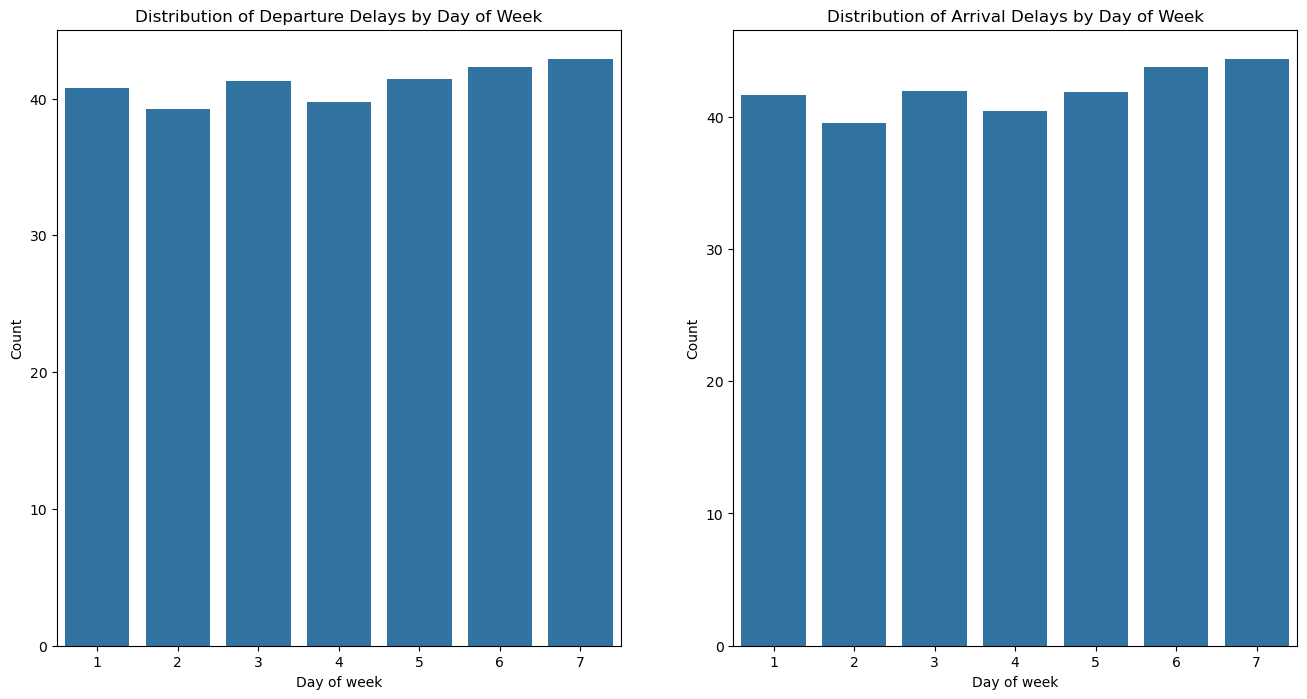

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

sns.barplot(data=df[df['Departure_Status'] == 'delayed'], x='DayOfWeek', y='DepDelay', errorbar=None, ax=ax[0])
ax[0].set(title='Distribution of Departure Delays by Day of Week', xlabel='Day of week', ylabel='Count')

sns.barplot(data=df[df['Arrival_Status'] == 'delayed'], x='DayOfWeek', y='ArrDelay', errorbar=None, ax=ax[1])
ax[1].set(title='Distribution of Arrival Delays by Day of Week', xlabel='Day of week', ylabel='Count')


## Cancellations

In [57]:
flights_mkt_cancellations = df.groupby('Airline_Mkt')['Cancelled'].agg(['sum', 'count']).reset_index()
flights_mkt_cancellations['perc_cancelled'] = round(flights_mkt_cancellations['sum'] / flights_mkt_cancellations['count'] * 100, 2)
flights_mkt_cancellations.sort_values('perc_cancelled', ascending=False)

,Airline_Mkt,sum,count,perc_cancelled
4,Frontier Airlines Inc.,3774,177233,2.13
6,JetBlue Airways,5763,273678,2.11
9,United Air Lines Inc.,22111,1294303,1.71
8,Spirit Air Lines,4486,263324,1.70
5,Hawaiian Airlines Inc.,1053,80895,1.30
3,Delta Air Lines Inc.,18181,1481380,1.23
2,American Airlines Inc.,20573,1754435,1.17
7,Southwest Airlines Co.,14325,1435563,1.00
0,Alaska Airlines Inc.,2849,384923,0.74
1,Allegiant Air,782,115207,0.68


[Text(0.5, 1.0, 'Distribution of Cancellations by Day of Week'),
 Text(0.5, 0, 'Day of week'),
 Text(0, 0.5, 'Count')]

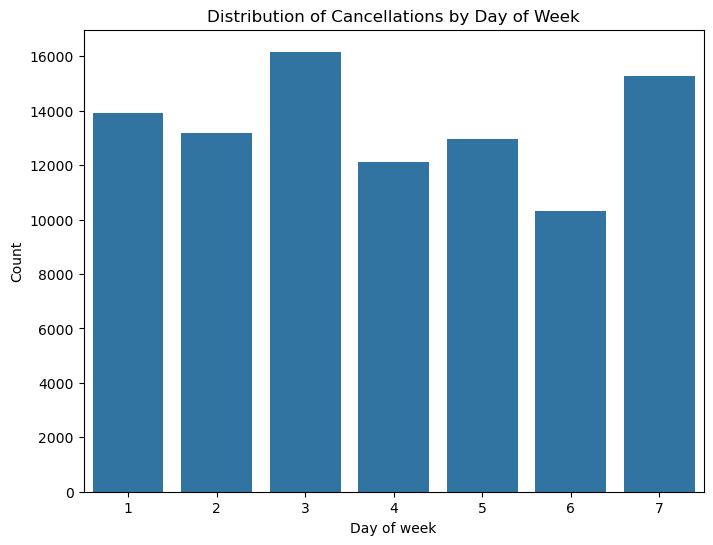

In [58]:
cancellations_dow = df.groupby('DayOfWeek')['Cancelled'].sum().reset_index()
cancellations_dow.columns = ['Day_of_Week', 'Count_Cancelled_Flights']

fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(data=cancellations_dow, x='Day_of_Week', y='Count_Cancelled_Flights', errorbar=None)
ax.set(title='Distribution of Cancellations by Day of Week', xlabel='Day of week', ylabel='Count')

[Text(0.5, 1.0, 'Distribution of Cancellations by Day of Month'),
 Text(0.5, 0, 'Day of week'),
 Text(0, 0.5, 'Count')]

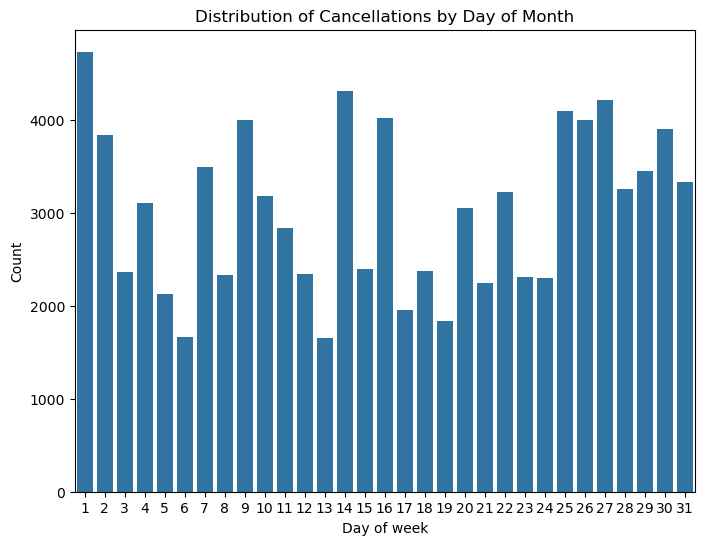

In [59]:
cancellations_dow = df.groupby('DayofMonth')['Cancelled'].sum().reset_index()
cancellations_dow.columns = ['Day_of_Month', 'Count_Cancelled_Flights']

fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(data=cancellations_dow, x='Day_of_Month', y='Count_Cancelled_Flights', errorbar=None)
ax.set(title='Distribution of Cancellations by Day of Month', xlabel='Day of week', ylabel='Count')

## Distance

In [60]:
df[['Distance']].describe().apply(lambda x: x.apply('{0:.2f}'.format))

,Distance
count,7260941.00
mean,806.52
std,593.75
min,21.00
25%,372.00
50%,647.00
75%,1044.00
max,5095.00


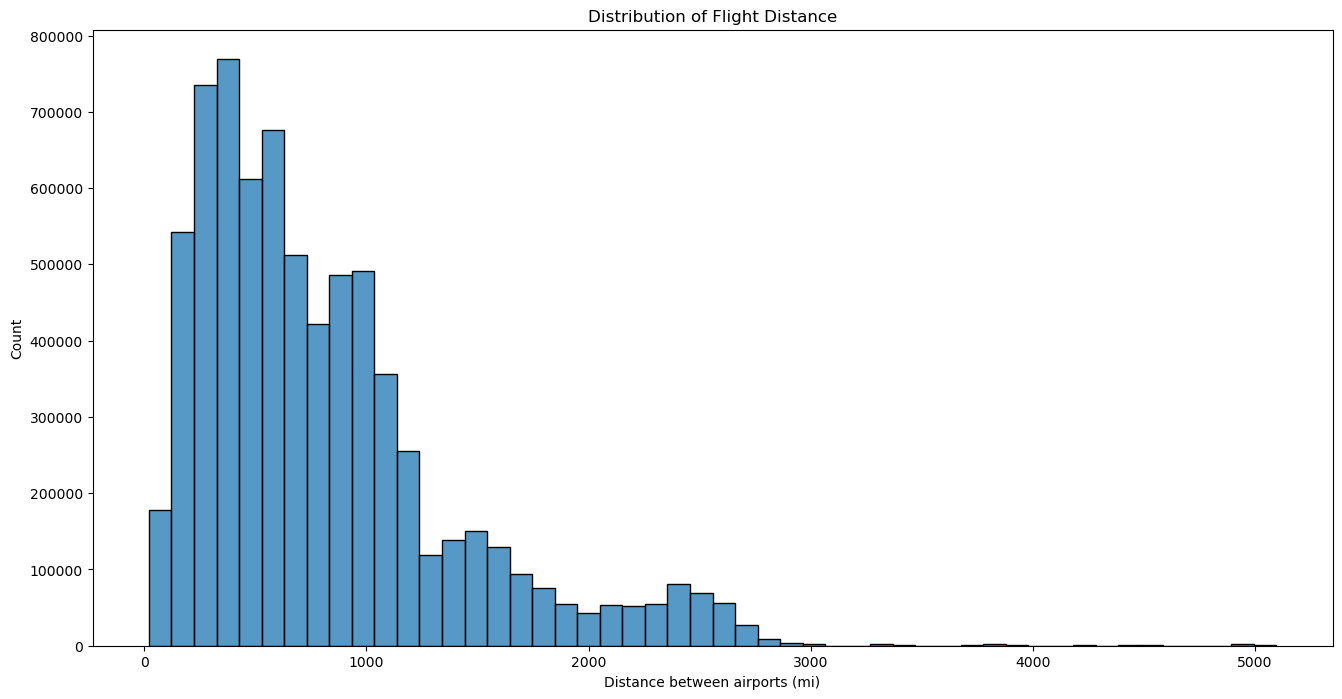

In [61]:
fig, ax = plt.subplots(figsize=(16,8))

sns.histplot(df['Distance'], bins=50)
ax.set(title='Distribution of Flight Distance', xlabel='Distance between airports (mi)')
ax.ticklabel_format(style='plain', axis='both')


In [62]:
df[['TaxiOut', 'TaxiIn']].describe().apply(lambda x: x.apply('{0:.2f}'.format))

,TaxiOut,TaxiIn
count,7167822.00,7167044.00
mean,17.54,8.10
std,9.34,6.47
min,1.00,1.00
25%,12.00,4.00
50%,15.00,6.00
75%,20.00,10.00
max,269.00,236.00


In [63]:
routes = df[['Origin', 'Dest']].value_counts().reset_index()
routes.head(50)

,Origin,Dest,count
0,HNL,OGG,12610
1,OGG,HNL,12605
2,LAX,SFO,11726
3,SFO,LAX,11700
4,LAX,LAS,10575
5,LAS,LAX,10562
6,JFK,LAX,10024
7,LAX,JFK,10010
8,LGA,ORD,9902
9,ORD,LGA,9881


In [64]:
df['Origin'].nunique()

359

In [65]:
df['Dest'].nunique()

359